In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from datetime import datetime
from scipy.stats import fisher_exact

In [2]:
df2019_1 = pd.read_excel('2019_docketx.xlsx', sheet_name='Proceedings')
df2019_2 = pd.read_excel('2019_dockety.xlsx', sheet_name='Proceedings')
df2020 = pd.read_excel('2020_docketx.xlsx', sheet_name='Proceedings')
df2021 = pd.read_excel('2021_docketx.xlsx', sheet_name= "Proceedings")
df2022 = pd.read_excel('2022_docketx.xlsx', sheet_name='Proceedings')

In [3]:
df2023 = pd.read_excel('2023_docketx.xlsx', sheet_name= "Proceedings")
df2024 = pd.read_excel('2024_docketx.xlsx', sheet_name= "Proceedings")

dataframe701 = pd.concat([df2019_1, df2019_2, df2020, df2021, df2022, df2023, df2024])

In [4]:
df2019info_1 = pd.read_excel('2019_docketx.xlsx', sheet_name='Defendant')
df2019info_2 = pd.read_excel('2019_dockety.xlsx', sheet_name='Defendant')
df2020info = pd.read_excel('2020_docketx.xlsx', sheet_name='Defendant')
df2021info = pd.read_excel('2021_docketx.xlsx', sheet_name= "Defendant")
df2022info = pd.read_excel('2022_docketx.xlsx', sheet_name='Defendant')
df2023info = pd.read_excel('2023_docketx.xlsx', sheet_name='Defendant')
df2024info = pd.read_excel('2024_docketx.xlsx', sheet_name='Defendant')

In [5]:
df2019cdc_1 = pd.read_excel('2019_docketx.xlsx', sheet_name='CDCProceedings')
df2019cdc_2 = pd.read_excel('2019_dockety.xlsx', sheet_name='CDCProceedings')
df2020cdc = pd.read_excel('2020_docketx.xlsx', sheet_name='CDCProceedings')
df2021cdc = pd.read_excel('2021_docketx.xlsx', sheet_name= "CDCProceedings")
df2022cdc = pd.read_excel('2022_docketx.xlsx', sheet_name='CDCProceedings')

In [6]:
df2020charge = pd.read_excel('2020_docketx.xlsx', sheet_name='Charges')
df2021charge = pd.read_excel('2021_docketx.xlsx', sheet_name= "Charges")
df2022charge = pd.read_excel('2022_docketx.xlsx', sheet_name='Charges')
df2019charge_1 = pd.read_excel('2019_docketx.xlsx', sheet_name='Charges')
df2019charge_2 = pd.read_excel('2019_dockety.xlsx', sheet_name='Charges')

In [7]:
dataframe = pd.concat([df2019_1, df2019_2, df2020, df2021, df2022, ])
dfcdc = pd.concat([ df2019cdc_1, df2019cdc_2, df2020cdc, df2021cdc, df2022cdc, ])
dfcharge = pd.concat([df2019charge_1, df2019charge_2, df2020charge, df2021charge, df2022charge, ])
dfinfo = pd.concat([df2019info_1, df2019info_2,df2020info, df2021info, df2022info])
dfinfo701 = pd.concat([df2019info_1, df2019info_2,df2020info, df2021info, df2022info, df2023info, df2024info])

Proceeing Data from cases where the first proceeding beginnings from 01/01/2019-12/31/2022


In [8]:
dataframe['Proceeding Date'] = pd.to_datetime(dataframe['Proceeding Date'], errors='coerce')
dfcdc['Proceeding Date'] = pd.to_datetime(dfcdc['Proceeding Date'], errors='coerce')
dataframe = dataframe[dataframe["Proceeding Date"] > pd.Timestamp("2018-12-31")]
dfcdc = dfcdc[dfcdc["Proceeding Date"] > pd.Timestamp("2018-12-31")]

In [124]:
end_of_2022 = datetime(2022, 12, 31).year
dfinfo["Age"] = end_of_2022 - dfinfo["Birth Year"]

In [9]:
casedfpro= dataframe[["Magistrate Number", "Proceeding Text", "Proceeding Date"]]
casedfpro["Court"] = "Magistrate"
casedfcdc= dfcdc[["Magistrate Number", "Proceeding Text", "Proceeding Date"]]
casedfcdc["Court"] = "CDC"
casedfcdc = casedfcdc.rename(columns={'Proceeding Text': 'Text'})
casedfpro = casedfpro.rename(columns={'Proceeding Text': 'Text'})
casedfcdc = casedfcdc.sort_values(by=['Magistrate Number', "Proceeding Date"], ascending = [True, True])
casedfpro = casedfpro.sort_values(by=['Magistrate Number', "Proceeding Date"], ascending = [True, True])

slcasedf1 = casedfpro.groupby('Magistrate Number').apply(lambda x: x.iloc[:-1]).reset_index(drop=True)
slcasedf2 = casedfcdc.groupby('Magistrate Number').apply(lambda x: x.iloc[:-1]).reset_index(drop=True)
slcasedf = pd.concat([slcasedf1, slcasedf2])
slcasedf = slcasedf.dropna()
slcasedf = slcasedf.sort_values(by=['Magistrate Number', "Proceeding Date"], ascending = [True, True])
slcasedf = slcasedf.drop_duplicates(subset=['Magistrate Number'], keep='last')

tlcasedf1 = casedfpro.groupby('Magistrate Number').apply(lambda x: x.iloc[:-2]).reset_index(drop=True)
tlcasedf2 = casedfcdc.groupby('Magistrate Number').apply(lambda x: x.iloc[:-2]).reset_index(drop=True)
tlcasedf = pd.concat([tlcasedf1, tlcasedf2])
tlcasedf = tlcasedf.dropna()
tlcasedf = tlcasedf.sort_values(by=['Magistrate Number', "Proceeding Date"], ascending = [True, True])
tlcasedf = tlcasedf.drop_duplicates(subset=['Magistrate Number'], keep='last')

casedfpro = casedfpro.drop_duplicates(subset=['Magistrate Number'], keep='last')
casedfcdc = casedfcdc.drop_duplicates(subset=['Magistrate Number'], keep='last')
casedf = pd.concat([casedfcdc, casedfpro])
casedf = casedf.dropna()
casedf = casedf.sort_values(by=['Magistrate Number', "Proceeding Date"], ascending = [True, True])
casedf = casedf.drop_duplicates(subset=['Magistrate Number'], keep='last')

<ipython-input-9-a3ea8deabf5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casedfpro["Court"] = "Magistrate"
<ipython-input-9-a3ea8deabf5f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casedfcdc["Court"] = "CDC"
<ipython-input-9-a3ea8deabf5f>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the grouping

In [123]:
print("Number of cases: " + str(len(casedf)))

Number of cases: 24326


###Exploratory Analysis

In [11]:
totalval = len(casedf["Magistrate Number"].unique())
makeupdf = casedf.merge(dfinfo, on="Magistrate Number", how='inner')
makeupdf = makeupdf.drop_duplicates(subset=['Magistrate Number'], keep='last')
blackdf = makeupdf[makeupdf["Race"] == "Black"]
lenblack = len(blackdf)
print("Out of " + str(totalval) + " cases " + str(lenblack) + " of the defendants are black")
whitedf = makeupdf[makeupdf["Race"] == "White"]
lenwhite = len(whitedf)
print("Out of " + str(totalval) + " cases " + str(lenwhite) + " of the defendants are white")

Out of 24326 cases 11650 of the defendants are black
Out of 24326 cases 3142 of the defendants are white


In [12]:
race = makeupdf["Race"].value_counts().reset_index()
race.columns = ['Race', 'count']
race
fig = px.pie(race,
             values='count',
             names='Race',
             title = 'Cases by Race')

fig.show()

In [13]:
sex = makeupdf["Sex"].value_counts().reset_index()
sex.columns = ['Sex', 'count']
fig = px.pie(sex,
             values='count',
             names='Sex',
             title = 'Cases by Sex')

fig.show()

Text(0.5, 1.0, 'Distribution of Age of Defendants ')

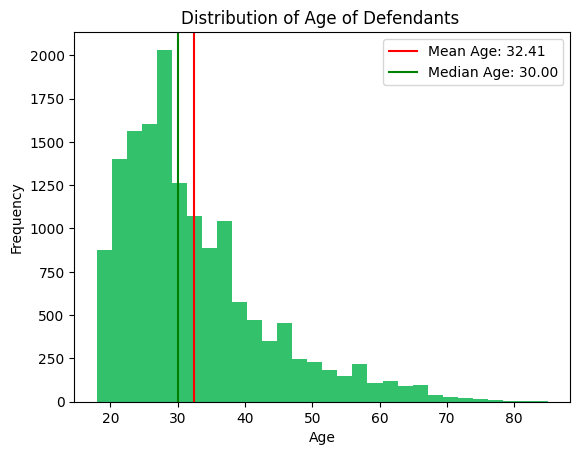

In [14]:
age = makeupdf["Age"]
avdays =age.mean()
mediandays =age.median()
labelmean = f"Mean Age: {avdays:.2f}"
labelmedian = f"Median Age: {mediandays:.2f}"

plt.hist(age, bins=30, color = ['#34c16b'])
plt.axvline(x= avdays, c='r', label=labelmean)
plt.axvline(x= mediandays, c='g',label = labelmedian)
plt.legend()

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Distribution of Age of Defendants ")

In [15]:
overfifty = makeupdf[makeupdf["Age"] >= 50]
ofifty = len(overfifty)
print("Number of defendants over 50 years old " + str(ofifty))
perfifty = (ofifty/totalval) *100
print(f"Out of {totalval} at {perfifty:.2f}%")
underthirty = makeupdf[makeupdf["Age"] < 30 ]
uthirty = len(underthirty)
print("Number of defendants under 30 years old " + str(uthirty))
perthirty = (uthirty/totalval) *100
print(f"Out of {totalval} at {perthirty:.2f}%")

Number of defendants over 50 years old 1326
Out of 24326 at 5.45%
Number of defendants under 30 years old 7479
Out of 24326 at 30.74%


In [16]:
makeupdf['Category'] = np.where((makeupdf["Race"] == "Black") & (makeupdf["Sex"] == "Male"),
                                "Black Male", "Other")
makeupdf
category_counts = makeupdf["Category"].value_counts().reset_index()
category_counts.columns = ['Category', 'count']

# Create the pie chart
fig = px.pie(category_counts,
             values='count',
             names='Category',
             title='Proportion of Black Male Defendants vs. Others')
fig.show()

Text(0.5, 1.0, 'Distribution of Age of Black Male Defendants ')

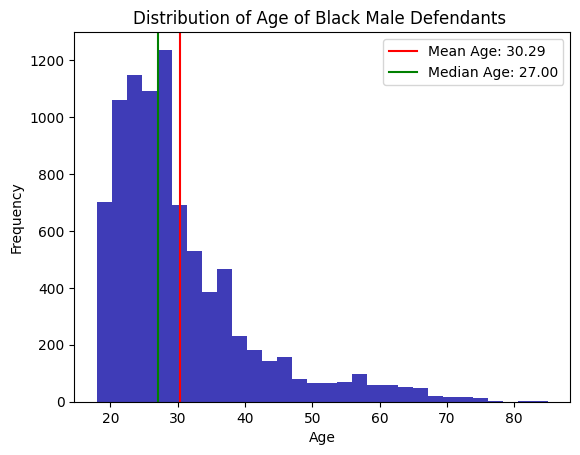

In [17]:
blackage = makeupdf[makeupdf["Category"]== "Black Male"]
age = blackage["Age"]
avdays =age.mean()
mediandays =age.median()
labelmean = f"Mean Age: {avdays:.2f}"
labelmedian = f"Median Age: {mediandays:.2f}"

plt.hist(age, bins=30, color = ['#3f3cb7'])
plt.axvline(x= avdays, c='r', label=labelmean)
plt.axvline(x= mediandays, c='g',label = labelmedian)
plt.legend()

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Distribution of Age of Black Male Defendants ")

Text(0.5, 1.0, 'Distribution of Age of Defendants exlcuding Black Males ')

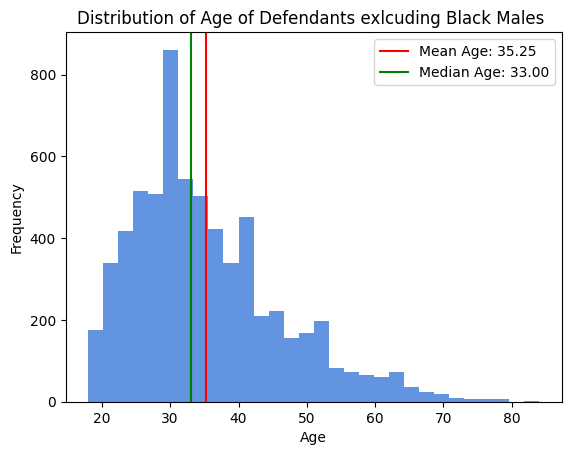

In [18]:
blackage = makeupdf[makeupdf["Category"]== "Other"]
age = blackage["Age"]
avdays =age.mean()
mediandays =age.median()
labelmean = f"Mean Age: {avdays:.2f}"
labelmedian = f"Median Age: {mediandays:.2f}"

plt.hist(age, bins=30, color = ['#6294e0'])
plt.axvline(x= avdays, c='r', label=labelmean)
plt.axvline(x= mediandays, c='g',label = labelmedian)
plt.legend()

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Distribution of Age of Defendants exlcuding Black Males ")

<ipython-input-20-8b36df8c57d9>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-8b36df8c57d9>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Occurences of Article 701')

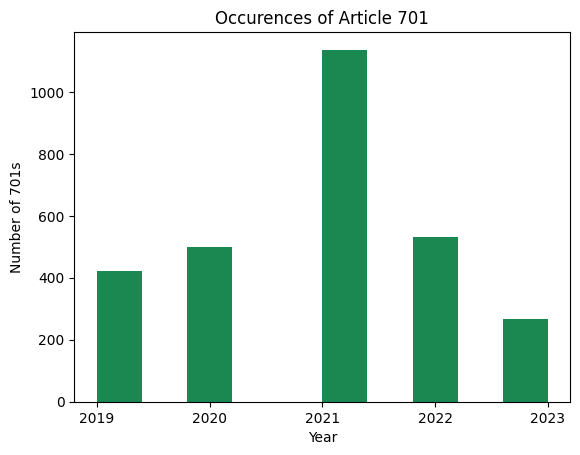

In [20]:
dataframe701 = dataframe701[dataframe701["Proceeding Date"] > pd.Timestamp("2018-12-31")]
dataframe701 = dataframe701[dataframe701["Proceeding Date"] < pd.Timestamp("2024-01-01")]
Proceeding = dataframe701[["Magistrate Number", "Proceeding Date", "Proceeding Text"]]

def find_701(s):
  if '701' in s:
    return True
  else:
    return False

Proceeding['Has701'] = Proceeding['Proceeding Text'].apply(find_701)
SevOPro = Proceeding[Proceeding.Has701 == True]
SevOPro["Year"] = SevOPro["Proceeding Date"].dt.year

plt.hist(SevOPro["Year"], bins = 10, color=['#1b8852'])
plt.xticks(range(int(SevOPro["Year"].min()), int(SevOPro["Year"].max()) + 1))
plt.xlabel('Year')
plt.ylabel('Number of 701s')
plt.title("Occurences of Article 701")

Text(0.5, 1.0, 'Occurences of Article 701 by Race')

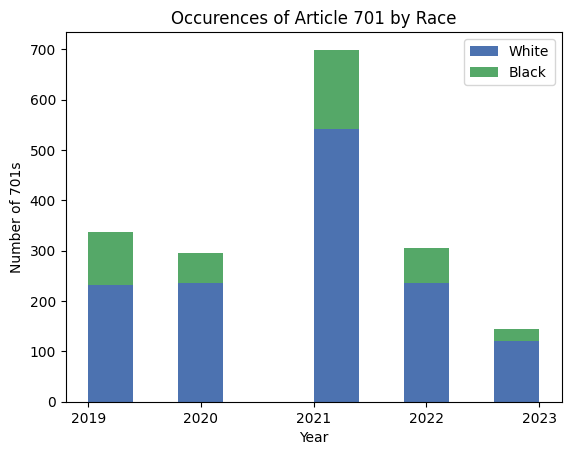

In [21]:
SevOPro1 = SevOPro.merge(dfinfo701, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
white_sev = SevOPro1[SevOPro1["Race"] == "White"]["Year"]
black_sev = SevOPro1[SevOPro1["Race"] == "Black"]["Year"]

plt.hist([black_sev, white_sev], bins=10, stacked=True, color=['#4C72B0', '#55A868'],label=['White', 'Black'])
plt.legend()
plt.xticks(range(int(SevOPro["Year"].min()), int(SevOPro["Year"].max()) + 1))
plt.xlabel('Year')
plt.ylabel('Number of 701s')
plt.title("Occurences of Article 701 by Race")

In [22]:
amountofcases = len(Proceeding["Magistrate Number"].unique())
print("Out of " + str(amountofcases))
sev = len(SevOPro)
print(str(sev) + " instances of 701 identified in")
unisev = len(SevOPro["Magistrate Number"].unique())
print(str(unisev) + " unique cases")

Out of 31122
2854 instances of 701 identified in
2471 unique cases


In [23]:
dfcdc.rename(columns={'Proceeding Text': 'CDCText'}, inplace=True)
dataframe.rename(columns={'Proceeding Text': 'ProText'}, inplace=True)
dfcdc1 = dfcdc
dataframe1 = dataframe
dfcdc1["CDCText"] = dfcdc1["CDCText"].str.replace(r'\s+', ' ', regex=True)
dataframe1["ProText"] = dataframe1["ProText"].str.replace(r'\s+', ' ', regex=True)
dfcourt = pd.concat([dataframe1, dfcdc1])
dfcourt = dfcourt.drop(columns=["Clerk", "Section", "Magistrate", "Case ID"])
dfcourt = dfcourt.sort_values(by=['Magistrate Number', "Proceeding Date"], ascending = [True, True])
dfcourt = dfcourt.fillna(0)

<ipython-input-23-12454858e6f5>:10: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



##Custody

In [24]:
def CustodyCheck(s):
  if(s == 0):
    return 0
  elif ('IN CUSTODY') in s:
    return 1
  elif ('TRANSPORTED') in s:
    return 1
  elif ("FEDERAL CUSTODY") in s:
    return 1
  elif ("TRANSPORTED TO COURT") in s:
    return 1
  elif ("JAIL LIST") in s:
    return 1
  elif("SHE IS TO BE RELEASED") in s:
    return 1
  elif("HE IS TO BE RELEASED") in s:
    return 1
  elif("FILED ARREST ON CAPIAS") in s:
    return 1
  elif("ARRESTED") in s:
    return 1
  elif ("CAPIAS ISSUED") in s:
    return 2
  elif("ALIAS CAPIAS REMAINS") in s:
    return 2
  elif ("RELEASE ISSUED") in s:
    return 2
  elif ('FAILED TO APPEAR') in s:
    return 2
  elif("DID NOT APPEAR") in s:
    return 2
  elif("POSTED BOND") in s:
    return 2
  elif("HOUSE ARREST") in s:
    return 2
  elif("SURETY") in s:
    return 2
  elif("STAY AWAY ORDER") in s:
    return 2
  else:
    return 3

dfcourt['CDC Custody'] = dfcourt['CDCText'].apply(CustodyCheck)
dfcourt['MCustody'] = dfcourt['ProText'].apply(CustodyCheck)
dfcourt["Custody"] = dfcourt["MCustody"] + dfcourt["CDC Custody"]
dfcourt = dfcourt.drop(columns=["CDC Custody", "MCustody"])

In [25]:
for i in range(len(dfcourt)):
  if dfcourt.ROR.iloc[i] == 1:
    dfcourt.Custody.iloc[i] = 2
  if dfcourt["Stay Away Order"].iloc[i] == 1:
    dfcourt.Custody.iloc[i] = 2

Streaming output truncated to the last 5000 lines.
<ipython-input-25-b5c55bc9238a>:5: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<ipython-input-25-b5c55bc9238a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice

In [26]:
dataframedates = dataframe
dfcdcdates = dfcdc
dates = pd.concat([dfcdcdates, dataframedates])
first_dates = dates.sort_values('Proceeding Date').drop_duplicates(subset=['Magistrate Number'], keep='first')
last_dates = dates.sort_values('Proceeding Date').drop_duplicates(subset=['Magistrate Number'], keep='last')
finaldates = first_dates.merge(last_dates, on="Magistrate Number", suffixes=('_first', '_last'))
finaldates["Court Days"] = (finaldates["Proceeding Date_last"] - finaldates["Proceeding Date_first"]).dt.days
totaldaysdf = finaldates[['Magistrate Number', 'Court Days']]


<ipython-input-27-f72957b9a2a6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Distribution of Duration of a Court Case ')

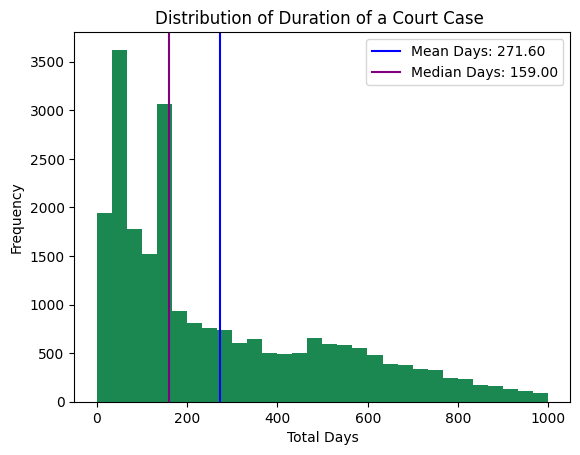

In [27]:
dfcourtdays = totaldaysdf
dfcourtdays["Court Days"] = finaldates["Court Days"].astype(float)
dfcourtdays1 = dfcourtdays[dfcourtdays["Court Days"] > 0]
dfcourtdays1 = dfcourtdays[dfcourtdays["Court Days"] < 1000]

dfcourtdays1 = dfcourtdays1.drop_duplicates(subset=['Magistrate Number'], keep='first')
dayscourt = dfcourtdays1["Court Days"]

avdays =  dayscourt.mean()
mediandays =  dayscourt.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)
plt.legend()
plt.hist(dayscourt, bins = 30, color=['#1b8852'])
plt.xlabel('Total Days')
plt.ylabel('Frequency')
plt.title("Distribution of Duration of a Court Case ")

In [28]:
cus = {'Magistrate Number': [0], 'Days in Custody': [0], 'Start Custody': [0], "End Custody": [0]}
cusinfo = pd.DataFrame(cus)
testdfcourt = dfcourt[["Magistrate Number", "Proceeding Date", "Custody"]]
cusstart = False
for i in range(len(testdfcourt)):
  magn = testdfcourt["Magistrate Number"].iloc[i]
  lastmagn = testdfcourt["Magistrate Number"].iloc[i-1]
  if (magn == lastmagn) or (i == 0):
    findlastentry = False
    if testdfcourt["Custody"].iloc[i] == 1:
      startdate = testdfcourt["Proceeding Date"].iloc[i]
      cusstart = True
      currmag = testdfcourt["Magistrate Number"].iloc[i]
    if testdfcourt["Custody"].iloc[i] == 2:
      if cusstart == True:
          endcus = testdfcourt["Proceeding Date"].iloc[i]
          dayscus =  (endcus - startdate)
          new = {'Magistrate Number': currmag, 'Days in Custody': [dayscus], 'Start Custody': [startdate], "End Custody": [endcus], "NoUpdate": [0]}
          new_row = pd.DataFrame(new)
          cusinfo = pd.concat([cusinfo, new_row], ignore_index=True)
          cusstart = False
  elif cusstart == True:
          i -= 1
          while findlastentry == False:
            if lastmagn == testdfcourt["Magistrate Number"].iloc[i]:
              findlastentry = True
              endcus = testdfcourt["Proceeding Date"].iloc[i]
              dayscus =  (endcus - startdate)
              new = {'Magistrate Number': lastmagn, 'Days in Custody': [dayscus], 'Start Custody': [startdate], "End Custody": [endcus], "NoUpdate": [1]}
              new_row = pd.DataFrame(new)
              cusinfo = pd.concat([cusinfo, new_row], ignore_index=True)
              cusstart = False
            else:
              i -= 1
              print(i)
cusinfo = cusinfo.drop(index=0)
cusinfo['Days in Custody'] = pd.to_timedelta(cusinfo['Days in Custody'], errors='coerce')
cusinfo["Days Float"] = cusinfo['Days in Custody'].dt.total_seconds() / (24 * 3600)
cusinfopred1 = cusinfo

Distribution of Custody Lengths from a day or more to 100 days

In [29]:
amountofcases = len(testdfcourt["Magistrate Number"].unique())
print("Out of " + str(amountofcases))
custody = len(cusinfo)
print(str(custody) + " instances of cutody identified in")
unicus = len(cusinfo["Magistrate Number"].unique())
print(str(unicus) + " unique cases")

Out of 24326
7735 instances of cutody identified in
5223 unique cases


HERE LOCATION

In [30]:
custodyval = cusinfo["Days Float"]
custody = casedf.merge(cusinfo, on=["Magistrate Number"], how='left')
custody = custody.drop_duplicates(subset=['Magistrate Number'])
custody =custody.fillna(0)
custodyval = custody["Days Float"]
custodymean = custodyval.mean()
print(f"Including all cases, the average time in custody is {custodymean:.2f} days")

Including all cases, the average time in custody is 12.54 days


Text(0.5, 1.0, 'Distribution of Days in Custody from 1 day to 100 days ')

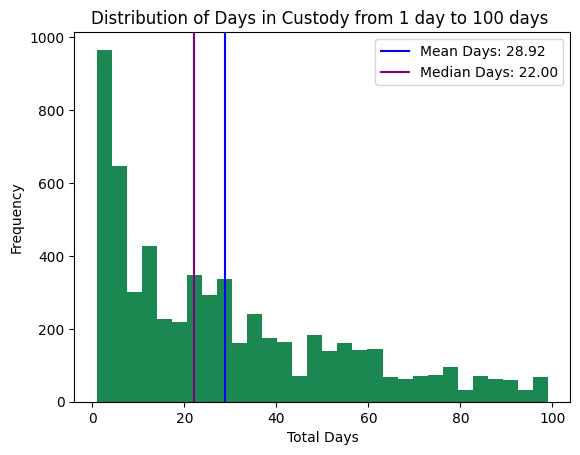

In [31]:
cusdf = cusinfo[cusinfo["Days Float"] < 100]
cusdf = cusdf[cusdf["Days Float"] > 0]
vals = cusdf["Days Float"]
plt.hist(vals, bins = 30, color=['#1b8852'])

avdays =vals.mean()
mediandays =vals.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)
plt.legend()

plt.xlabel('Total Days')
plt.ylabel('Frequency')
plt.title("Distribution of Days in Custody from 1 day to 100 days ")

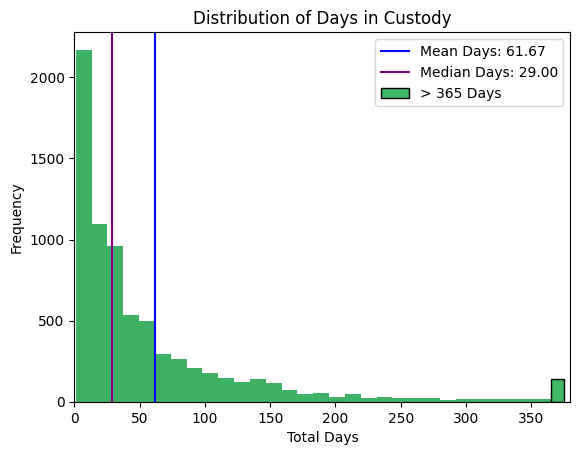

In [32]:
yearcus = cusinfo[cusinfo['Days Float'] > 0]
graphyear_main = yearcus[yearcus['Days Float'] <= 365]["Days Float"]  # 1 to 365 days
graphyear_extra = yearcus[yearcus['Days Float'] > 365]  # > 365 days
graphyear_extra = graphyear_extra[graphyear_extra['Days Float'] < 1095]["Days Float"]  # > 365 days

plt.hist(graphyear_main, bins=30, color='#3fb164', align='mid')
plt.bar(370, len(graphyear_extra), width=10, color='#3fb865', edgecolor="black", label='> 365 Days')

avdays = yearcus["Days Float"].mean()
mediandays = yearcus["Days Float"].median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"

plt.axvline(x=avdays, color='blue', label=labelmean)
plt.axvline(x=mediandays, color='purple', label=labelmedian)

plt.legend()
plt.xlabel('Total Days')
plt.ylabel('Frequency')
plt.title("Distribution of Days in Custody")

plt.xlim(0, 380)
plt.show()

Text(0.5, 1.0, 'Distribution of Days in Custody from 100 days to 2 Years')

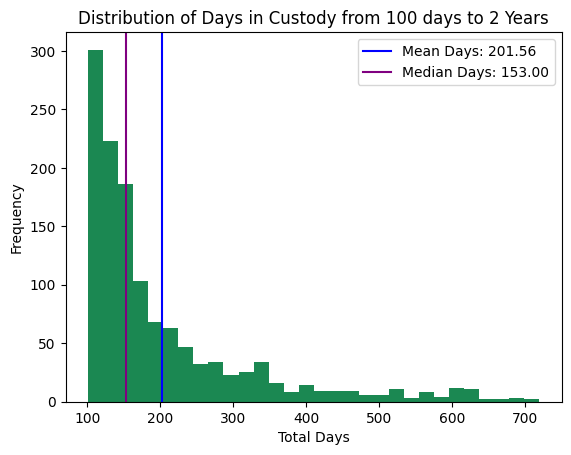

In [33]:
cusvals = cusinfo[cusinfo['Days Float']< 730]
cusvals = cusvals[cusvals['Days Float']> 100]
graphcus = cusvals["Days Float"]
plt.hist(graphcus, bins = 30, color=['#1b8852'])

plt.xlabel('Total Days')
plt.ylabel('Frequency')
avdays =graphcus.mean()
mediandays =graphcus.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)
plt.legend()

plt.title("Distribution of Days in Custody from 100 days to 2 Years")

In [34]:
dfcourtcus = dfcourt[["Magistrate Number", "Custody"]]
dfcourtcus["Custody"] = 0
dfcourtcus = dfcourtcus.drop_duplicates(subset=['Magistrate Number'], keep='last')
cusinfocourt = cusinfo[["Magistrate Number", "Days Float"]]
cusinfocourt.rename(columns={'Days Float': 'Custody'}, inplace=True)
combined_df = pd.merge(dfcourtcus, cusinfocourt, on="Magistrate Number", how="left", suffixes=('_left', '_right'))
combined_df["Days Float"] = combined_df["Custody_left"].fillna(0) + combined_df["Custody_right"].fillna(0)
final_df = combined_df.groupby("Magistrate Number", as_index=False)["Days Float"].sum()

<ipython-input-34-c0e70cdf6010>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-34-c0e70cdf6010>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Want to make sure that magistrate numbers are unique and there are no duplicate cases, the goal should be to add custody values identified so that can estimate total time in custody

In [35]:
lencus = len(cusinfocourt["Magistrate Number"].unique())
lencourt = len(dfcourtcus)
percencus = (lencus/lencourt) *100
print("Out of " + str(lencourt) +" cases, " + str(lencus) + " were identified to have spent time in custody at " + "{:.2f}".format(percencus) + "% of cases")

Out of 24326 cases, 5223 were identified to have spent time in custody at 21.47% of cases


In [36]:
days = cusinfo[cusinfo["Days Float"]> 0]
days = days[days["Days Float"]< 731]

days = days["Days Float"]
avdays = days.mean()
meddays = days.median()
stdvdays = days.std()
mindays = days.min()
maxdays = days.max()

print("Given that defendant spends time in custody...")
print(f"The Average Days in jail: {avdays:.2f}")
print(f"The Median Days in jail: {meddays:.1f}")
print(f"Standard Deviation of days in jail: {stdvdays:.2f}")
print("Minimum days in jail: ", mindays)
print("Maximum days in jail: ", maxdays)

Given that defendant spends time in custody...
The Average Days in jail: 59.05
The Median Days in jail: 29.0
Standard Deviation of days in jail: 85.64
Minimum days in jail:  1.0
Maximum days in jail:  719.0


In [37]:
days = cusinfo[cusinfo["Days Float"]> 1]
days = days[days["Days Float"]< 365]
days = days["Days Float"]

avdays = days.mean()
meddays = days.median()
stdvdays = days.std()
mindays = days.min()
maxdays = days.max()

print("Using only Custody durations ranging between a day and a year...")
print("The Average Days in jail: ", avdays, )
print("The Median Days in jail: ", meddays, )
print("Standard Deviation of days in jail: ", stdvdays)
print("Minimum days in jail: ", mindays)
print("Maximum days in jail: ", maxdays)

Using only Custody durations ranging between a day and a year...
The Average Days in jail:  54.51045039740948
The Median Days in jail:  31.0
Standard Deviation of days in jail:  62.490631428587214
Minimum days in jail:  2.0
Maximum days in jail:  362.0


Text(0.5, 1.0, 'Black Custody')

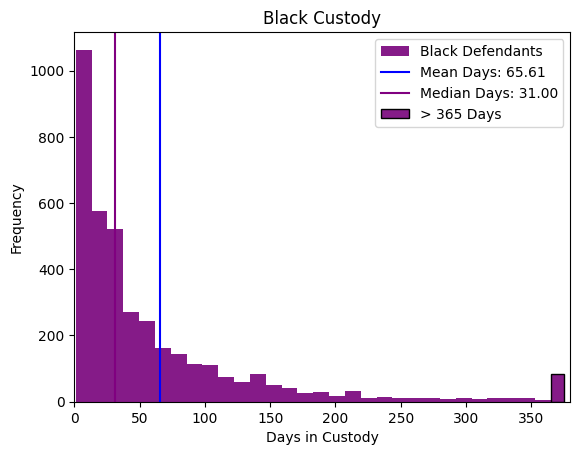

In [126]:
dfinfocus = dfinfo
dfinfocus = cusinfo.merge(dfinfocus, on=["Magistrate Number"], how='right')
dfinfocus = dfinfocus[dfinfocus['Days Float'] > 0]
black_days = dfinfocus[dfinfocus["Race"] == "Black"]

graphyear_main = black_days[black_days['Days Float'] <= 365]["Days Float"]  # 1 to 365 days
graphyear_extra = black_days[black_days['Days Float'] > 365]  # > 365 days
graphyear_extra = graphyear_extra[graphyear_extra['Days Float'] < 1095]["Days Float"]  # > 365 days

black_days = dfinfocus[dfinfocus["Race"] == "Black"]["Days Float"]

plt.hist(graphyear_main,  bins=30, color =['#851b88'], label=['Black Defendants'])
plt.bar(370, len(graphyear_extra), width=10, color='#851b88', edgecolor="black", label='> 365 Days')

avdays = black_days.mean()
mediandays = black_days.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"

plt.axvline(x=avdays, color='blue', label=labelmean)
plt.axvline(x=mediandays, color='purple', label=labelmedian)


plt.xlim(0, 380)
plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Black Custody")

Text(0.5, 1.0, 'White Custody')

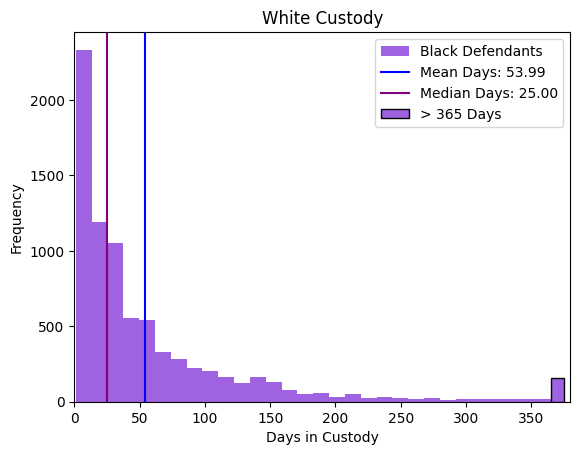

In [39]:
dfinfocus = dfinfo
dfinfocus = cusinfo.merge(dfinfocus, on=["Magistrate Number"], how='right')
dfinfocus = dfinfocus[dfinfocus['Days Float'] > 0]
white_days = dfinfocus[dfinfocus["Race"] == "White"]["Days Float"]

graphyear_main = dfinfocus[dfinfocus['Days Float'] <= 365]["Days Float"]  # 1 to 365 days
graphyear_extra = dfinfocus[dfinfocus['Days Float'] > 365]  # > 365 days
graphyear_extra = graphyear_extra[graphyear_extra['Days Float'] < 1095]["Days Float"]  # > 365 days

plt.hist(graphyear_main,  bins=30, color =['#9f62e0'], label=['Black Defendants'])
plt.bar(370, len(graphyear_extra), width=10, color='#9f62e0', edgecolor="black", label='> 365 Days')

avdays = white_days.mean()
mediandays = white_days.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"

plt.axvline(x=avdays, color='blue', label=labelmean)
plt.axvline(x=mediandays, color='purple', label=labelmedian)


plt.xlim(0, 380)
plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("White Custody")

In [40]:
days = black_days
avdays = days.mean()
meddays = days.median()
stdvdays = days.std()
mindays = days.min()
maxdays = days.max()
print("Isolating for only black defendants who have spent time in custody ranging from a day to a year")
print("The Average Days in jail: ", avdays, )
print("The Median Days in jail: ", meddays, )
print("Standard Deviation of days in jail: ", stdvdays)
print("Minimum days in jail: ", mindays)
print("Maximum days in jail: ", maxdays)

Isolating for only black defendants who have spent time in custody ranging from a day to a year
The Average Days in jail:  65.6136778908901
The Median Days in jail:  31.0
Standard Deviation of days in jail:  106.03641209580344
Minimum days in jail:  1.0
Maximum days in jail:  1285.0


In [41]:
days = white_days
avdays = days.mean()
meddays = days.median()
stdvdays = days.std()
mindays = days.min()
maxdays = days.max()
print("Isolating for only white defendants who have spent time in custody ranging from a day to a year")
print("The Average Days in jail: ", avdays, )
print("The Median Days in jail: ", meddays, )
print("Standard Deviation of days in jail: ", stdvdays)
print("Minimum days in jail: ", mindays)
print("Maximum days in jail: ", maxdays)

Isolating for only white defendants who have spent time in custody ranging from a day to a year
The Average Days in jail:  53.99367755532139
The Median Days in jail:  25.0
Standard Deviation of days in jail:  96.63576162125266
Minimum days in jail:  1.0
Maximum days in jail:  955.0


Text(0.5, 1.0, 'Custody by Race')

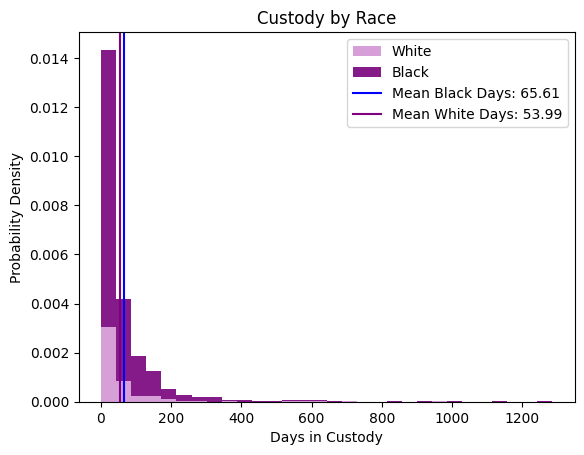

In [42]:
plt.hist([white_days, black_days], bins=30, density = True,  stacked=True, color=['#d69fd8', '#851b88'], label=['White', 'Black'])

wavdays =white_days.mean()
bavdays =black_days.mean()
blabelmean = f"Mean Black Days: {bavdays:.2f}"
wlabelmean = f"Mean White Days: {wavdays:.2f}"

plt.axvline(x= bavdays, c='blue', label=blabelmean)
plt.axvline(x= wavdays, c='purple',label = wlabelmean)
plt.legend()

plt.xlabel('Days in Custody')
plt.ylabel('Probability Density')
plt.title("Custody by Race")

Text(0.5, 1.0, 'Female Custody')

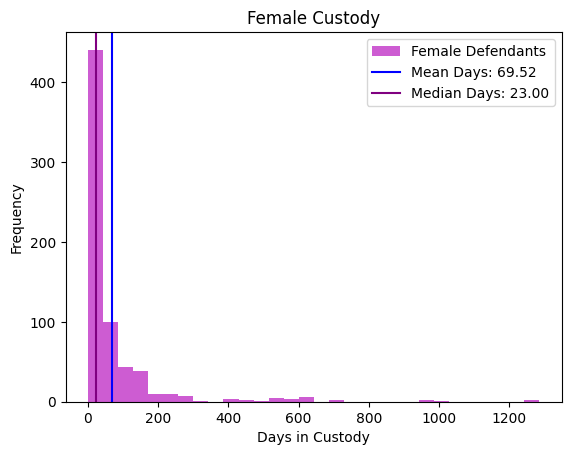

In [108]:
female_days = dfinfocus[dfinfocus["Sex"] == "Female"]["Days Float"]

plt.hist([female_days], bins=30, stacked=True, color= ["#cd5cd2"], label=['Female Defendants'])

avdays =female_days.mean()
mediandays =female_days.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)

plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Female Custody")

955.0


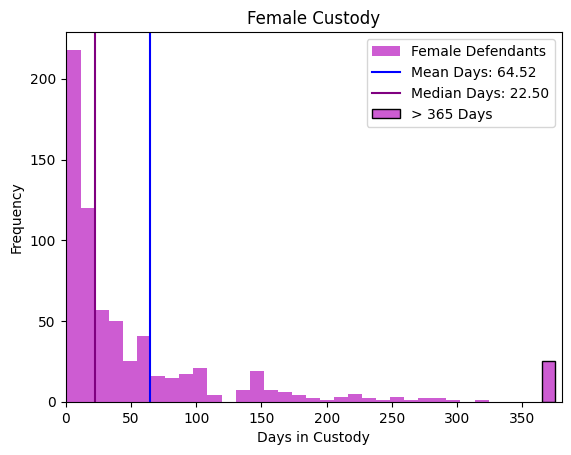

In [119]:
dfinfocus = dfinfo
dfinfocus = cusinfo.merge(dfinfocus, on=["Magistrate Number"], how='right')
dfinfocus = dfinfocus[dfinfocus['Days Float'] > 0]
female_days = dfinfocus[dfinfocus["Sex"] == "Female"]
female_days = female_days[female_days['Days Float'] < 1000]

graphyear_main = female_days[female_days['Days Float'] <= 365]["Days Float"]  # 1 to 365 days
graphyear_extra = female_days[female_days['Days Float'] > 365]  # > 365 days
graphyear_extra = graphyear_extra[graphyear_extra['Days Float'] < 1000]["Days Float"]  # > 365 days

female_days = female_days["Days Float"]

plt.hist(graphyear_main,  bins=30, color =["#cd5cd2"], label=['Female Defendants'])
plt.bar(370, len(graphyear_extra), width=10, color='#cd5cd2', edgecolor="black", label='> 365 Days')

avdays = female_days.mean()
mediandays = female_days.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"

plt.axvline(x=avdays, color='blue', label=labelmean)
plt.axvline(x=mediandays, color='purple', label=labelmedian)


plt.xlim(0, 380)
plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Female Custody")
print((female_days.max()))

Text(0.5, 1.0, 'Male Custody')

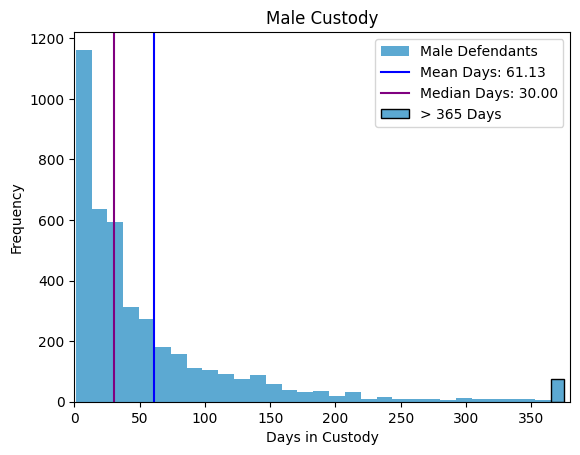

In [121]:
dfinfocus = dfinfo
dfinfocus = cusinfo.merge(dfinfocus, on=["Magistrate Number"], how='right')
dfinfocus = dfinfocus[dfinfocus['Days Float'] > 0]
male_days = dfinfocus[dfinfocus["Sex"] == "Male"]
male_days = male_days[male_days['Days Float'] < 1000]


graphyear_main = male_days[male_days['Days Float'] <= 365]["Days Float"]  # 1 to 365 days
graphyear_extra = male_days[male_days['Days Float'] > 365]  # > 365 days
graphyear_extra = graphyear_extra[graphyear_extra['Days Float'] < 1000]["Days Float"]  # > 365 days

male_days = male_days["Days Float"]

plt.hist(graphyear_main,  bins=30, color =["#5ca9d2"], label=['Male Defendants'])
plt.bar(370, len(graphyear_extra), width=10, color="#5ca9d2", edgecolor="black", label='> 365 Days')

avdays = male_days.mean()
mediandays = male_days.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"

plt.axvline(x=avdays, color='blue', label=labelmean)
plt.axvline(x=mediandays, color='purple', label=labelmedian)


plt.xlim(0, 380)
plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Male Custody")

Text(0.5, 1.0, 'Custody by Gender')

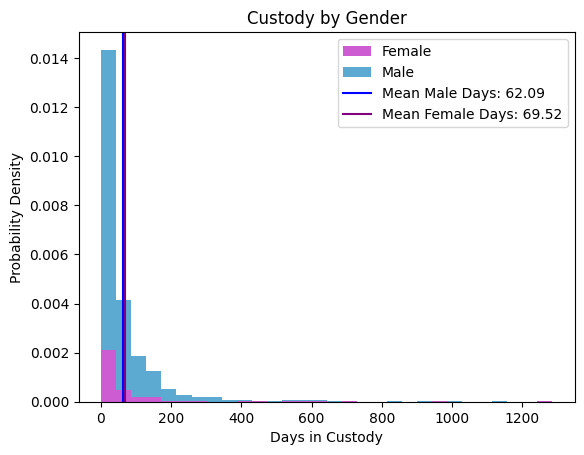

In [46]:
female_days = dfinfocus[dfinfocus["Sex"] == "Female"]["Days Float"]
male_days = dfinfocus[dfinfocus["Sex"] == "Male"]["Days Float"]

plt.hist([female_days, male_days], bins=30, density= True, stacked=True,color=['#cd5cd2', '#5ca9d2'],label=['Female', 'Male'])

wavdays =female_days.mean()
bavdays =male_days.mean()
blabelmean = f"Mean Male Days: {bavdays:.2f}"
wlabelmean = f"Mean Female Days: {wavdays:.2f}"
plt.axvline(x= bavdays, c='blue', label=blabelmean)
plt.axvline(x= wavdays, c='purple',label = wlabelmean)

plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Probability Density')
plt.title("Custody by Gender")

Text(0.5, 1.0, 'Defendants Older than 30 Custody')

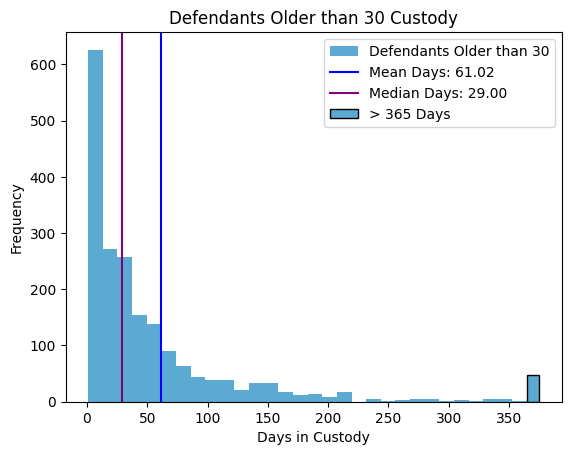

In [129]:
old_days1 = dfinfocus[dfinfocus["Age"] > 30]

graphyear_main = old_days1[old_days1['Days Float'] <= 365]["Days Float"]  # 1 to 365 days
graphyear_extra = old_days1[old_days1['Days Float'] > 365]  # > 365 days
graphyear_extra = graphyear_extra[graphyear_extra['Days Float'] < 1000]["Days Float"]  # > 365 days

old_days1 = old_days1["Days Float"]
plt.hist(graphyear_main,  bins=30, color =["#5ca9d2"], label=['Defendants Older than 30'])
plt.bar(370, len(graphyear_extra), width=10, color="#5ca9d2", edgecolor="black", label='> 365 Days')

avdays =old_days1.mean()
mediandays =old_days1.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)

plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Defendants Older than 30 Custody")

Text(0.5, 1.0, 'Defendants 30 and Younger Custody')

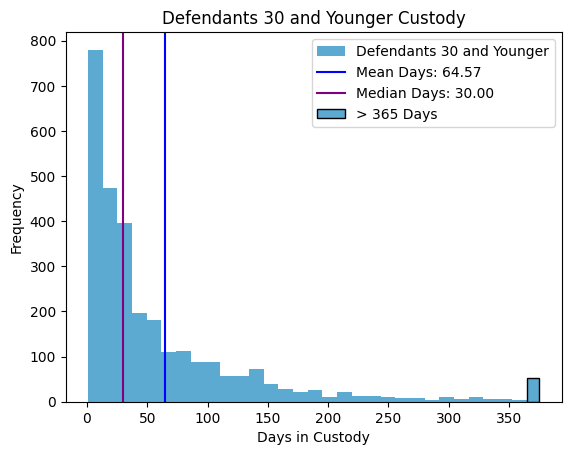

In [132]:
young_days = dfinfocus[dfinfocus["Age"]<= 30]

graphyear_main = young_days[young_days['Days Float'] <= 365]["Days Float"]  # 1 to 365 days
graphyear_extra = young_days[young_days['Days Float'] > 365]  # > 365 days
graphyear_extra = graphyear_extra[graphyear_extra['Days Float'] < 1000]["Days Float"]  # > 365 days

young_days = young_days["Days Float"]

plt.hist(graphyear_main,  bins=30, color =["#5ca9d2"], label=['Defendants 30 and Younger'])
plt.bar(370, len(graphyear_extra), width=10, color="#5ca9d2", edgecolor="black", label='> 365 Days')



avdays =young_days.mean()
mediandays =young_days.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)

plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Defendants 30 and Younger Custody")

Text(0.5, 1.0, 'Defendants between 30 and 45')

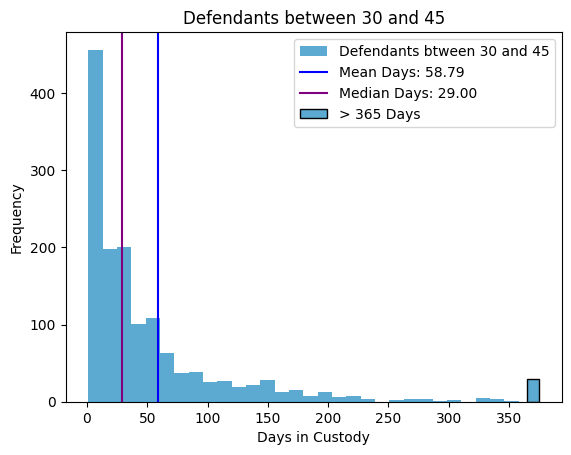

In [133]:
young_days = dfinfocus[dfinfocus["Age"] > 30]
young_days = young_days[young_days["Age"] < 45]

graphyear_main = young_days[young_days['Days Float'] <= 365]["Days Float"]  # 1 to 365 days
graphyear_extra = young_days[young_days['Days Float'] > 365]  # > 365 days
graphyear_extra = graphyear_extra[graphyear_extra['Days Float'] < 1000]["Days Float"]  # > 365 days

young_days = young_days["Days Float"]

plt.hist(graphyear_main,  bins=30, color =["#5ca9d2"], label=['Defendants btween 30 and 45'])
plt.bar(370, len(graphyear_extra), width=10, color="#5ca9d2", edgecolor="black", label='> 365 Days')



avdays =young_days.mean()
mediandays =young_days.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)

plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Defendants between 30 and 45")

In [50]:
chargedf = dfcharge
chargedf = chargedf.merge(final_df, left_on="Magistrate Number", right_on="Magistrate Number", how='inner')
chargedf =chargedf.drop(columns=["Charge Code", "Bond", "Count"])
dfwcharge = chargedf
chargedf = chargedf.groupby('Charge Name').apply(lambda x: pd.Series({
    'Total Cases': len(x),
    '% Cases with Custody': f"{(x['Days Float'] > 1).mean() * 100:.2f}",
    'Average Days in Custody':f"{x['Days Float'].mean():.2f}",
    'Average Days Given Custody': f"{x.loc[x['Days Float'] > 1, 'Days Float'].mean():.2f}"
})).reset_index()
chargedf['% Cases with Custody'] = pd.to_numeric(chargedf['% Cases with Custody'], errors='coerce')
chargedf['Total Cases'] = pd.to_numeric(chargedf['Total Cases'], errors='coerce')
chargedf = chargedf[chargedf["Total Cases"] > 5]
chargedf["Average Days in Custody"] = pd.to_numeric(chargedf["Average Days in Custody"], errors="coerce")
chargedf["Average Days Given Custody"] = pd.to_numeric(chargedf["Average Days Given Custody"], errors="coerce")
chargedf = chargedf.dropna()

<ipython-input-50-8b766132292f>:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [51]:
chargedf = chargedf.sort_values(by=['% Cases with Custody'], ascending = [False])
styled_df = chargedf.head(10).style.format({
    'Total Cases': "{:.2f}",
    '% Cases with Custody': "{:.2f}%",
    'Average Days in Custody': "{:.2f}",
    'Average Days Given Custody': "{:.2f}"
}).background_gradient(subset=['% Cases with Custody', 'Average Days in Custody', 'Average Days Given Custody'], cmap='coolwarm')
styled_df

,Charge Name,Total Cases,% Cases with Custody,Average Days in Custody,Average Days Given Custody
509,ILLEGAL CARRYING WEAPON 3RD CONVICTION,12.00,91.67%,80.25,87.55
392,DUTY OF OFFENDERS NOTIFY LAW ENFORCEMENT,7.00,85.71%,58.86,68.67
57,AGG RAPE,6.00,83.33%,123.33,148.00
872,PWIT DISTRIBUTE DIAZEPAM,9.00,77.78%,42.89,55.14
33,AGG 2ND DEGREE DOMESTIC BAT W/FIREARM,9.00,77.78%,28.56,36.71
303,DAMAGE TO PROPERTY W/INTENT TO DEFRAUD,8.00,75.00%,114.75,153.00
101,ATT HOME INVASION,8.00,75.00%,49.75,66.33
119,ATT PURSE SNATCHING,8.00,75.00%,105.25,140.33
131,ATT SIMPLE ESCAPE,8.00,75.00%,55.88,74.50
179,BATTERY ON DATING PARTNER W/ DANG WEAPON,12.00,75.00%,93.08,124.11


In [52]:
chargedf = chargedf.sort_values(by=['Total Cases'], ascending = [False])
styled_df = chargedf.head(10).style.format({
    'Total Cases': "{:}",
    '% Cases with Custody': "{:.2f}%",
    'Average Days in Custody': "{:.2f}",
    'Average Days Given Custody': "{:.2f}"
}).background_gradient(subset=['% Cases with Custody', 'Average Days in Custody', 'Average Days Given Custody'], cmap='coolwarm')
styled_df

,Charge Name,Total Cases,% Cases with Custody,Average Days in Custody,Average Days Given Custody
363,DOMESTIC ABUSE BATTERY,4361,11.19%,7.37,65.83
687,POSS OF A FIREARM OR WEAPON BY FELON,2218,40.58%,42.70,105.20
979,SIMPLE CRIMINAL DAMAGE TO PROPERTY,2006,18.59%,14.15,76.06
369,DOMESTIC ABUSE CHILD ENDANGEMENT LAW,1524,13.45%,10.79,80.13
964,SIMPLE BATTERY,1397,21.33%,18.49,86.66
968,SIMPLE BURGLARY,1345,42.08%,46.50,110.47
512,ILLEGAL CARRYING WEAPONS,1303,24.02%,27.73,115.41
511,ILLEGAL CARRYING WEAPON WITH CDS,1293,28.15%,27.96,99.30
42,AGG ASSAULT WITH A FIREARM,1261,25.77%,26.23,101.75
931,RESISTING AN OFFICER,1244,34.81%,37.08,106.48


In [53]:
chargedfav = chargedf.sort_values(by=['Average Days in Custody'], ascending = [False])
styled_df = chargedfav.head(10).style.format({
    'Total Cases': "{:}",
    '% Cases with Custody': "{:.2f}%",
    'Average Days in Custody': "{:.2f}",
    'Average Days Given Custody': "{:.2f}"
}).background_gradient(subset=['% Cases with Custody', 'Average Days in Custody', 'Average Days Given Custody'], cmap='coolwarm')
styled_df

,Charge Name,Total Cases,% Cases with Custody,Average Days in Custody,Average Days Given Custody
1067,TRAFFICKING OF CHILDREN FOR SEX PURPOSES,13,61.54%,347.00,563.88
149,ATT THIRD DEGREE RAPE,8,37.50%,293.00,781.33
541,INTENTIONAL EXPOSURE TO AIDS,8,25.00%,174.25,697.00
140,ATT THEFT BETWEEN $750 - $25K,7,57.14%,165.57,289.75
258,CONSPIRE TO DIST HEROIN,13,53.85%,152.77,283.71
470,HUMAN TRAFFICKING,7,57.14%,151.00,264.25
123,ATT SECOND DEGREE RAPE,21,66.67%,136.43,204.64
146,ATT THEFT OF AN AUTO,17,52.94%,132.65,250.56
57,AGG RAPE,6,83.33%,123.33,148.00
836,PROSTITUTION,13,46.15%,117.85,255.33


In [54]:
chargedfavgiv = chargedf.sort_values(by=['Average Days Given Custody'], ascending = [False])
styled_df = chargedfavgiv.head(10).style.format({
    'Total Cases': "{:}",
    '% Cases with Custody': "{:.2f}%",
    'Average Days in Custody': "{:.2f}",
    'Average Days Given Custody': "{:.2f}"
}).background_gradient(subset=['% Cases with Custody', 'Average Days in Custody', 'Average Days Given Custody'], cmap='coolwarm')
styled_df

,Charge Name,Total Cases,% Cases with Custody,Average Days in Custody,Average Days Given Custody
149,ATT THIRD DEGREE RAPE,8,37.50%,293.00,781.33
541,INTENTIONAL EXPOSURE TO AIDS,8,25.00%,174.25,697.00
1067,TRAFFICKING OF CHILDREN FOR SEX PURPOSES,13,61.54%,347.00,563.88
890,PWIT LSD LESS THAN <28GRAMS,10,10.00%,44.10,441.00
1103,VEHICULAR NEGLIGENT INJURY,10,20.00%,78.20,391.00
942,SCHEDULE IV DRUGS,12,16.67%,62.00,372.00
398,DWI W/ BAC GREATER THAN .08,9,11.11%,40.56,365.00
903,PWIT OF OXYCODONE LESS THAN 28GRAMS,7,14.29%,48.43,339.00
866,PWIT DISTRIBUTE ALPRAZOLAM,18,27.78%,91.89,330.80
298,CULTIVATION OF MARIJUANA,13,15.38%,47.54,309.00


In [55]:
murder = dfwcharge[(dfwcharge["Charge Name"] == "MANSLAUGHTER")|
                   (dfwcharge["Charge Name"] == "ATT 1ST DEGREE MURDER" )|
                   (dfwcharge["Charge Name"] == "ATT 2ND DEGREE MURDER" )|
                   (dfwcharge["Charge Name"] == "2ND DEGREE MURDER")]

murder = murder.merge(dfinfocus, on=["Magistrate Number"], how='left')
murder = murder.dropna()

Text(0.5, 1.0, 'Manslaughter Custody')

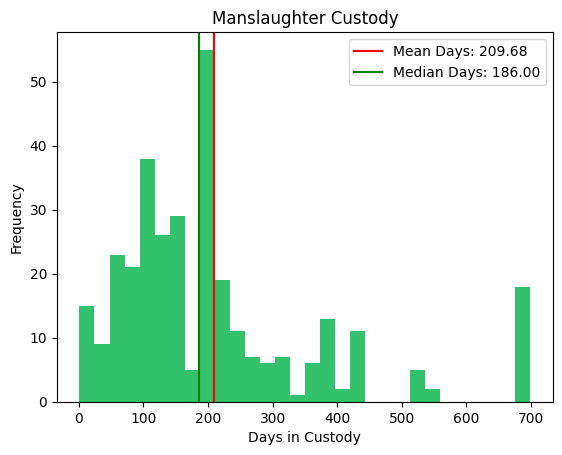

In [56]:
daygraph = murder["Days Float_x"]
avdays =daygraph.mean()
mediandays =daygraph.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"

plt.hist(daygraph, bins=30, color = ['#34c16b'])
plt.axvline(x= avdays, c='r', label=labelmean)
plt.axvline(x= mediandays, c='g',label = labelmedian)
plt.legend()

plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Manslaughter Custody")

Text(0.5, 1.0, 'Violent Crime Custody')

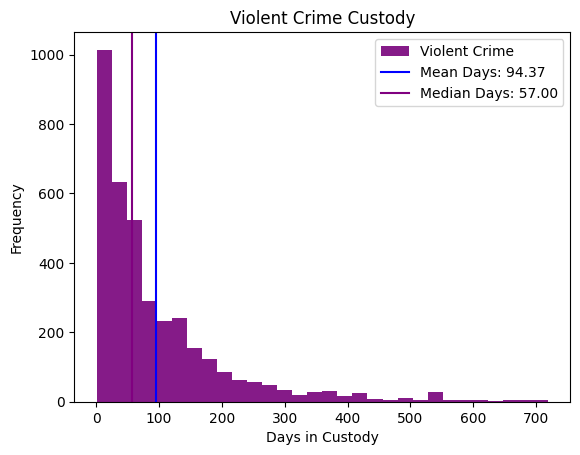

In [58]:
vcdf  = dfwcharge[dfwcharge["Violent Crime"] == 1.0]
vcdf
vcdf = vcdf[vcdf['Days Float'] <=730]
vcdf = vcdf[vcdf['Days Float'] > 0]
vcdays = vcdf["Days Float"]

plt.hist(vcdays, bins=30, color =['#851b88'], label=['Violent Crime'])

avdays =vcdays.mean()
mediandays =vcdays.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)

plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Violent Crime Custody")

Text(0.5, 1.0, 'Domestic Violence Custody')

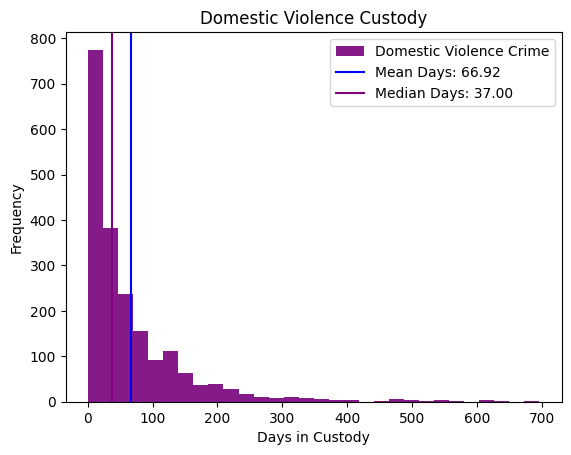

In [59]:
vcdf1  = dfwcharge[dfwcharge["Domestic Violence"] == 1.0]
vcdf1 = vcdf1[vcdf1['Days Float'] <=730]
vcdf1 = vcdf1[vcdf1['Days Float'] > 0]
vcdays1 = vcdf1["Days Float"]

plt.hist(vcdays1, bins=30, color =['#851b88'], label=['Domestic Violence Crime'])

avdays =vcdays1.mean()
mediandays =vcdays1.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)

plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Domestic Violence Custody")

Text(0.5, 1.0, 'Sex Offense Custody')

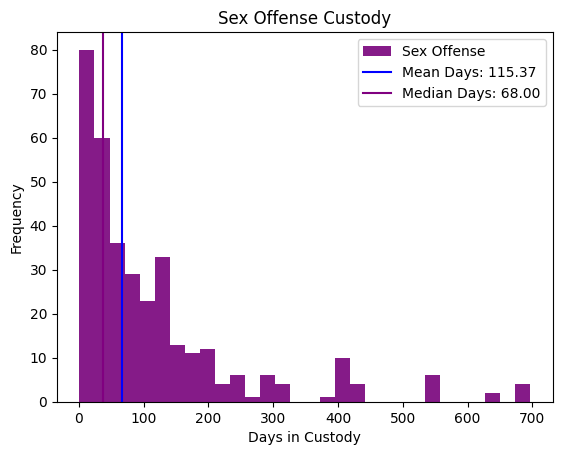

In [60]:
vcdf2  = dfwcharge[dfwcharge["Sex Offense"] == 1.0]
vcdf2 = vcdf2[vcdf2['Days Float'] <=730]
vcdf2 = vcdf2[vcdf2['Days Float'] > 0]
vcdays2 = vcdf2["Days Float"]

plt.hist(vcdays2, bins=30, color =['#851b88'], label=['Sex Offense'])

avdays2 =vcdays2.mean()
mediandays2 =vcdays2.median()
labelmean = f"Mean Days: {avdays2:.2f}"
labelmedian = f"Median Days: {mediandays2:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)

plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Sex Offense Custody")

Text(0.5, 1.0, 'Substance Use Custody')

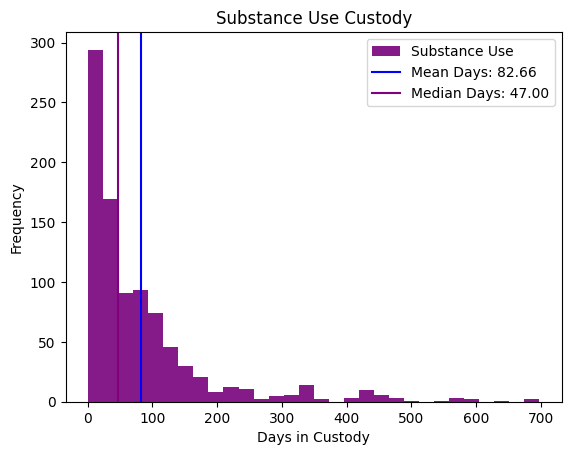

In [61]:
vcdf  = dfwcharge[dfwcharge["Substance Use"] == 1.0]
vcdf = vcdf[vcdf['Days Float'] <=730]
vcdf = vcdf[vcdf['Days Float'] > 0]
vcdays = vcdf["Days Float"]

plt.hist(vcdays, bins=30, color =['#851b88'], label=['Substance Use'])

avdays =vcdays.mean()
mediandays =vcdays.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)

plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Substance Use Custody")

Text(0.5, 1.0, 'Property Crime Custody')

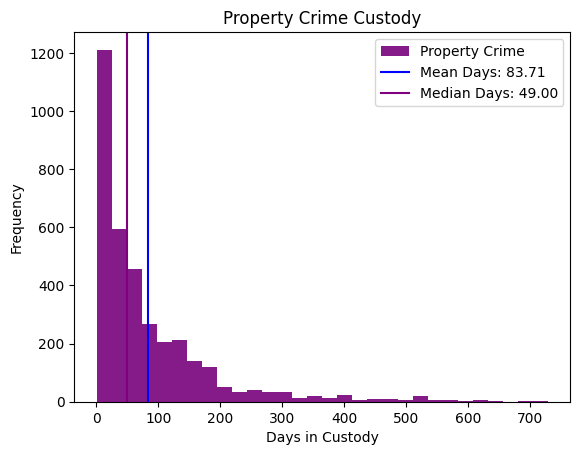

In [62]:
vcdf  = dfwcharge[dfwcharge["Property Crime"] == 1.0]
vcdf = vcdf[vcdf['Days Float'] <=730]
vcdf = vcdf[vcdf['Days Float'] > 0]

vcdays = vcdf["Days Float"]

plt.hist(vcdays, bins=30, color =['#851b88'], label=['Property Crime'])

avdays =vcdays.mean()
mediandays =vcdays.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)

plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Property Crime Custody")


Text(0.5, 1.0, 'Public Health Violation Custody')

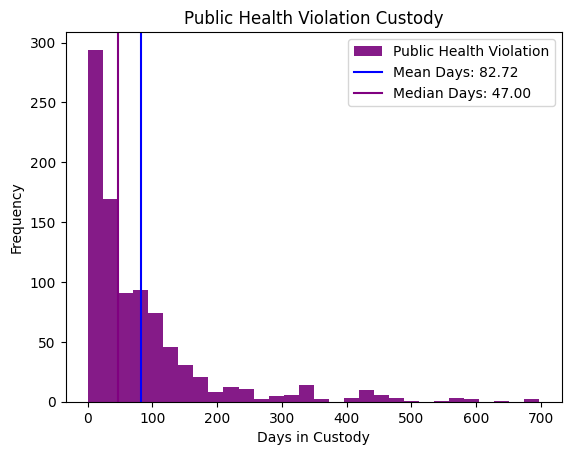

In [63]:
vcdf  = dfwcharge[dfwcharge["Public Health Violation"] == 1.0]
vcdf = vcdf[vcdf['Days Float'] <=730]
vcdf = vcdf[vcdf['Days Float'] > 0]

vcdays = vcdf["Days Float"]

plt.hist(vcdays, bins=30, color =['#851b88'], label=['Public Health Violation'])

avdays =vcdays.mean()
mediandays =vcdays.median()
labelmean = f"Mean Days: {avdays:.2f}"
labelmedian = f"Median Days: {mediandays:.2f}"
plt.axvline(x= avdays, c='blue', label=labelmean)
plt.axvline(x= mediandays, c='purple',label = labelmedian)

plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Public Health Violation Custody")


Text(0.5, 1.0, 'Possesion of a Firearm or Weapon Custody by Race')

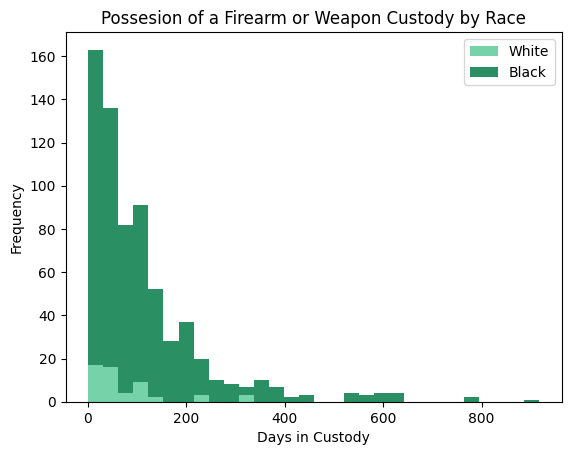

In [64]:
pfire = dfwcharge[dfwcharge["Charge Name"] == "POSS OF A FIREARM OR WEAPON BY FELON"]
pfire = pfire.merge(dfinfocus, on=["Magistrate Number"], how='left')
pfire = pfire.dropna()
pfwhite_days = pfire[pfire["Race"] == "White"]["Days Float_x"]
pfblack_days = pfire[pfire["Race"] == "Black"]["Days Float_x"]

plt.hist([pfwhite_days, pfblack_days], bins=30, color = ['#75d2a9','#2a9063'], stacked=True, label=['White', 'Black'])
plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Possesion of a Firearm or Weapon Custody by Race")

Text(0.5, 1.0, 'Domestic Abuse Battery Custody by Race')

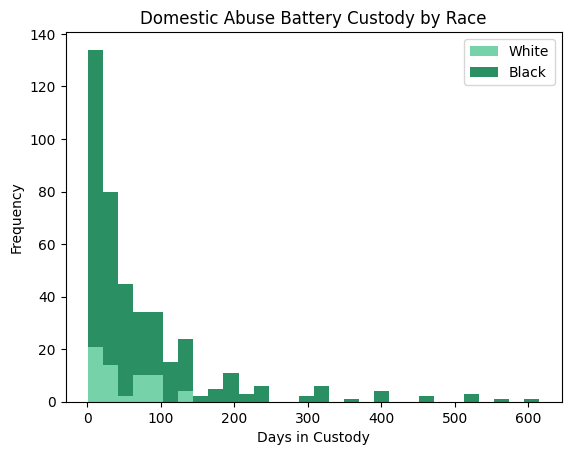

In [65]:
pfire = dfwcharge[dfwcharge["Charge Name"] == "DOMESTIC ABUSE BATTERY"]
pfire = pfire.merge(dfinfocus, on=["Magistrate Number"], how='left')
pfire = pfire.dropna()
pfwhite_days = pfire[pfire["Race"] == "White"]["Days Float_x"]
pfblack_days = pfire[pfire["Race"] == "Black"]["Days Float_x"]

plt.hist([pfwhite_days, pfblack_days], bins=30, color = ['#75d2a9','#2a9063'], stacked=True, label=['White', 'Black'])
plt.legend()
plt.xlabel('Days in Custody')
plt.ylabel('Frequency')
plt.title("Domestic Abuse Battery Custody by Race")

##Case Outcomes

In [66]:
def endcheck(s):
  if isinstance(s, str):
    if 'D.A.REFUSED CHARGES' in s:
      return 'DAR'
    elif 'D.A. REFUSED CHARGES' in s:
      return 'DAR'
    elif 'D.A.REFUSED' in s:
      return 'DAR'
    elif 'D.A. REFUSED' in s:
      return 'DAR'
    elif 'D.A. RFUSED' in s:
      return "DAR"
    elif 'CHARGES DROPPED' in s:
      return 'CD'
    elif 'PLED NOT GUILTY' in s:
      return "ON GOING"
    elif "FOUND GUILTY" in s:
      return "SENTENCED"
    elif 'PLED GUILTY' in s:
      return 'PLED GUILTY'
    elif "PLEA AGREEMENT" in s:
      return "PLED GUILTY"
    elif  "PLEA OF GUILTY" in s:
      return "PLED GUILTY"
    elif 'NOLLE PROSEQUI' in s:
      return 'NOLLE PROSEQUI'
    elif "SENTENCE" in s:
      return "SENTENCED"
    elif "SENTENCING" in s:
      return "SENTENCED"
    elif 'DECEASED' in s:
      return 'DEAD'
    elif 'CONTINUED WITHOUT DATE' in s:
        return 'ON GOING'
    elif "RESULT-HELD" in s:
      return "RESULT HELD"
    elif 'THE DEFENDANT HAS PAID ALL FINES AND FEES' in s:
      return "FINES PAID"
    elif "DEFENDANT PAID $" in s:
      return "FINES PAID"
    elif "PAID RESTITUTION IN FULL" in s:
      return "FINES PAID"
    elif "ORDERED DEFENDANT PAY" in s:
      return "FINES ISSUED"
    elif "MOOT" in s:
      if "MOOT REFUSED" not in s:
        return "MOOT"
    elif "EXTRADITION" in s:
      return "EXTRADITION"
    elif "ADMITTED TO ALLEGATIONS" in s:
      return "PLED GUILTY"
    elif "RELEASE OF PROPERTY" in s:
      return "PROPERTY RELEASE"
    elif "RELEASE PROPERTY" in s:
      return "PROPERTY RELEASE"
    elif "CASE TRANSFERRED" in s:
      return "CASE TRANSFERRED"
    elif 'REFUSED' in s:
      return 'REFUSED'
    elif "SET FOR" in s:
      return "ON GOING"
    elif "TRAIL" in s:
      return "ON GOING"
    else:
      return 0
  else:
    return 0

def slendcheck(s):
  if isinstance(s, str):
    if 'D.A.REFUSED CHARGES' in s:
      return 'DAR'
    elif 'D.A. REFUSED CHARGES' in s:
      return 'DAR'
    elif 'D.A.REFUSED' in s:
      return 'DAR'
    elif 'D.A. REFUSED' in s:
      return 'DAR'
    elif 'D.A. RFUSED' in s:
      return "DAR"
    elif 'CHARGES DROPPED' in s:
      return 'CD'
    elif 'PLED NOT GUILTY' in s:
      return "ON GOING"
    elif "FOUND GUILTY" in s:
      return "SENTENCED"
    elif 'PLED GUILTY' in s:
      return 'PLED GUILTY'
    elif "PLEA AGREEMENT" in s:
      return "PLED GUILTY"
    elif  "PLEA OF GUILTY" in s:
      return "PLED GUILTY"
    elif 'NOLLE PROSEQUI' in s:
      return 'NOLLE PROSEQUI'
    elif "SENTENCE" in s:
      return "SENTENCED"
    elif "SENTENCING" in s:
      return "SENTENCED"
    elif 'DECEASED' in s:
      return 'DEAD'
    elif 'CONTINUED WITHOUT DATE' in s:
        return 'ON GOING'
    elif "RESULT-HELD" in s:
      return "RESULT HELD"
    elif 'THE DEFENDANT HAS PAID ALL FINES AND FEES' in s:
      return "FINES PAID"
    elif "DEFENDANT PAID $" in s:
      return "FINES PAID"
    elif "PAID RESTITUTION IN FULL" in s:
      return "FINES PAID"
    elif "ORDERED DEFENDANT PAY" in s:
      return "FINES ISSUED"
    elif "MOOT" in s:
      if "MOOT REFUSED" not in s:
        return "MOOT"
    elif "EXTRADITION" in s:
      return "EXTRADITION"
    elif "ADMITTED TO ALLEGATIONS" in s:
      return "PLED GUILTY"
    elif "RELEASE OF PROPERTY" in s:
      return "PROPERTY RELEASE"
    elif "RELEASE PROPERTY" in s:
      return "PROPERTY RELEASE"
    elif "CASE TRANSFERRED" in s:
      return "CASE TRANSFERRED"
    elif 'REFUSED' in s:
      return 'REFUSED'
    elif "SET FOR" in s:
      return "ON GOING"
    elif "TRAIL" in s:
      return "ON GOING"
    else:
      return 0
  else:
    return 0

casedf["EndCase"] = casedf['Text'].apply(endcheck)
slcasedf["EndCase2"] = slcasedf["Text"].apply(slendcheck)
tlcasedf["EndCase3"] = tlcasedf["Text"].apply(slendcheck)

In [67]:
slcasedf = slcasedf[["Magistrate Number", "EndCase2"]]
tlcasedf = tlcasedf[["Magistrate Number", "EndCase3"]]
casedf = casedf.merge(slcasedf, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
casedf = casedf.merge(tlcasedf, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
casedf = casedf.fillna(0)

In [68]:
def update_endcase1(casedf):
    casedf["EndCase"] = np.where((casedf["EndCase"] == "ON GOING") & (casedf["EndCase2"] != 0), casedf["EndCase2"], casedf["EndCase"])
    casedf["EndCase"] = np.where((casedf["EndCase"] == "ON GOING") & (casedf["EndCase3"] != 0), casedf["EndCase3"], casedf["EndCase"])
    return casedf
def update_endcase2(casedf1):
    casedf1["EndCase"] = np.where((casedf1["EndCase"] == "MOOT") & (casedf1["EndCase2"] != 0), casedf1["EndCase2"], casedf1["EndCase"])
    casedf1["EndCase"] = np.where((casedf1["EndCase"] == "MOOT") & (casedf1["EndCase3"] != 0), casedf1["EndCase3"], casedf1["EndCase"])
    return casedf1
def update_endcase3(casedf):
    casedf["EndCase"] = np.where(casedf["EndCase"] == 0, casedf["EndCase2"], casedf["EndCase"])
    casedf["EndCase"] = np.where(casedf["EndCase"] == 0, casedf["EndCase3"], casedf["EndCase"])
    return casedf

updated_casedf = update_endcase1(casedf)
updated_casedf1 = update_endcase2(updated_casedf)
update_casedf = update_endcase3(updated_casedf1)


In [70]:
num = update_casedf['EndCase'].value_counts().nlargest(7).reset_index()
num.columns = ['EndCase', 'count']
fig = px.pie(num,
             values='count',
             names='EndCase',
             title = 'Case Outcomes')

fig.show()

In [71]:

pg = update_casedf[update_casedf['EndCase'] == "PLED GUILTY"]
pg = pg.merge(dfinfo, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
custom_colors = ['#4C72B0', '#55A868']

num = pg["Sex"].value_counts().nlargest(8).reset_index()
num.columns = ['Sex', 'count']
fig = px.pie(num,
             values='count',
             names='Sex',
             title = 'Pled Guilty by Sex',
             color_discrete_sequence=custom_colors)

fig.show()

In [72]:
pg = update_casedf[update_casedf['EndCase'] == "PLED GUILTY"]
pg = pg.merge(dfinfo, left_on="Magistrate Number", right_on="Magistrate Number", how='left')

num = pg["Race"].value_counts().nlargest(8).reset_index()
num.columns = ['Race', 'count']
fig = px.pie(num,
             values='count',
             names='Race',
             title = 'Pled Guilty by Race',
             color_discrete_sequence=custom_colors)

fig.show()

In [73]:
pg['Category'] = np.where((pg["Race"] == "Black") & (pg["Sex"] == "Male"),
                                "Black Male", "Other")
pg = pg.dropna()
category_counts = pg["Category"].value_counts().reset_index()
category_counts.columns = ['Category', 'count']

fig = px.pie(category_counts,
             values='count',
             names='Category',
             title='Pled Guilty Black Male Defendants vs. Others',
             color_discrete_sequence=custom_colors)
fig.show()

In [74]:
chargedropped = casedf[(casedf["EndCase"] == "REFUSED") | (casedf["EndCase"] == "DAR")| (casedf["EndCase"] == "CD")| (casedf["EndCase"] == "NOLLE PROSEQUI")]
cdpie = chargedropped.merge(dfinfo, left_on="Magistrate Number", right_on="Magistrate Number", how='left')

num = cdpie["Sex"].value_counts().reset_index()
num.columns = ['Sex', 'count']
fig = px.pie(num,
             values='count',
             names='Sex',
             title = 'Charges Dropped by Sex',
             color_discrete_sequence=custom_colors)

fig.show()

In [75]:
chargedropped = casedf[(casedf["EndCase"] == "REFUSED") | (casedf["EndCase"] == "DAR")| (casedf["EndCase"] == "CD")| (casedf["EndCase"] == "NOLLE PROSEQUI")]
cdpie = chargedropped.merge(dfinfo, left_on="Magistrate Number", right_on="Magistrate Number", how='left')

num = cdpie["Race"].value_counts().nlargest(8).reset_index()
num.columns = ['Race', 'count']
fig = px.pie(num,
             values='count',
             names='Race',
             title = 'Charges Dropped by Race',
             color_discrete_sequence=custom_colors)

fig.show()

In [76]:
preddf = update_casedf
preddf = preddf[["Magistrate Number", "EndCase"]]
cusinfopred = cusinfopred1
cusinfopred["Custody"] = cusinfopred1["Days Float"].apply(lambda x: 1 if x > 0 else 0)
cusinfopred = cusinfopred[["Magistrate Number", "Custody"]]
cusinfopred = cusinfopred.groupby('Magistrate Number', as_index=False)['Custody'].max()
preddf = preddf.merge(cusinfopred,left_on="Magistrate Number", right_on="Magistrate Number", how='left')
preddf["Custody"] = preddf["Custody"].fillna(0)
dfinfopred = dfinfo[["Magistrate Number","Sex", "Race", "Birth Year"]]
dfinfopred = dfinfopred.dropna()
current_year = datetime.now().year
dfinfopred["Age"] = current_year - dfinfopred["Birth Year"]
dfinfopred = dfinfopred[["Magistrate Number","Sex", "Race", "Age"]]
preddf = preddf.merge(dfinfopred,left_on="Magistrate Number", right_on="Magistrate Number", how='inner')
preddf = preddf.drop_duplicates(subset=['Magistrate Number'], keep='last')

In [77]:
pg = update_casedf[update_casedf['EndCase'] == "PLED GUILTY"]
numpg = len(pg)
pg = pg.merge(cusinfo, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
pg = pg.fillna(0)
c = len(pg[pg["Custody"] == 1])
percus = (c/numpg)*100
print(str(numpg) + " cases pled guilty; of these, " + str(c) + " were in custody at " + str(percus) + "%")

3314 cases pled guilty; of these, 2187 were in custody at 65.992757996379%


In [78]:
notpg = update_casedf[update_casedf['EndCase'] != "PLED GUILTY"]
notpg = notpg.merge(cusinfo, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
notpg = notpg.fillna(0)
numpg = len(notpg)
c = len(notpg[notpg["Custody"] == 1])
percus = (c/numpg)*100
print(str(numpg) + " cases did not plead guilty; of these, " + str(c) + " were in custody at " + str(percus) + "%")


22791 cases did not plead guilty; of these, 5164 were in custody at 22.658066780746786%


In [79]:
chargedropped = casedf[(casedf["EndCase"] == "REFUSED") | (casedf["EndCase"] == "DAR")| (casedf["EndCase"] == "NOLLE PROSEQUI")]
cdpie = chargedropped.merge(dfinfo, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
numcd = len(cdpie)
cdpie = cdpie.merge(cusinfo, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
cdpie = cdpie.fillna(0)
cuscd = len(cdpie[cdpie["Custody"] == 1])
percus = (cuscd/numcd)*100

print(str(numcd) + " cases had charges dropped; of these, " + str(cuscd) + " were in custody at " + str(percus) + "%")

13545 cases had charges dropped; of these, 1700 were in custody at 12.550756736803248%


In [80]:
nchargedropped = casedf[
    (casedf["EndCase"] != "REFUSED") &
    (casedf["EndCase"] != "DAR") &
    (casedf["EndCase"] != "NOLLE PROSEQUI")
]
ncd = nchargedropped.merge(dfinfo, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
numcd = len(ncd)
ncd = ncd.merge(cusinfo, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
ncd = ncd.fillna(0)
cuscd = len(ncd[ncd["Custody"] == 1])
percus = (cuscd/numcd)*100
print(str(numcd) + " cases had charges dropped; of these, " + str(cuscd) + " were in custody at " + str(percus) + "%")

11851 cases had charges dropped; of these, 6244 were in custody at 52.68753691671589%


In [134]:
chargedropped = casedf[(casedf["EndCase"] == "REFUSED") | (casedf["EndCase"] == "DAR")| (casedf["EndCase"] == "CD")| (casedf["EndCase"] == "NOLLE PROSEQUI")]
cusdrop2 = cusvals[cusvals["Days Float"] > 0]
cusdrop = chargedropped.merge(cusdrop2, left_on="Magistrate Number", right_on="Magistrate Number", how='inner')
cusdrop

,Magistrate Number,Text,Proceeding Date,Court,EndCase,EndCase2,EndCase3,Days in Custody,Start Custody,End Custody,NoUpdate,Days Float
0,574413,>DEFENSE COUNSEL STARVOS PANAGOULOU...,2020-03-06,CDC,REFUSED,ON GOING,ON GOING,322 days,2019-02-25 00:00:00,2020-01-13 00:00:00,0.0,322.0
1,577572,">DEFENDANT, SHANE E ALEXANDER DID N...",2021-02-23,CDC,NOLLE PROSEQUI,NOLLE PROSEQUI,ON GOING,153 days,2019-02-12 00:00:00,2019-07-15 00:00:00,0.0,153.0
2,577586,D.A.REFUSED CHARGE R.S.14 34 ON 05-...,2019-05-13,Magistrate,DAR,RESULT HELD,0,122 days,2019-01-11 00:00:00,2019-05-13 00:00:00,1.0,122.0
3,577849,RULE TO SHOW CAUSE IN MAGISTRATE CO...,2019-06-16,Magistrate,DAR,0,DAR,144 days,2019-01-23 00:00:00,2019-06-16 00:00:00,1.0,144.0
4,577863,">THE DEFENDANT, ROY E MILTON APPEAR...",2021-09-29,CDC,NOLLE PROSEQUI,ON GOING,0,193 days,2019-08-03 00:00:00,2020-02-12 00:00:00,0.0,193.0
...,...,...,...,...,...,...,...,...,...,...,...,...
253,600984,>DEFENSE COUNSEL DIAMONIQUE WHALEY ...,2023-08-30,CDC,NOLLE PROSEQUI,NOLLE PROSEQUI,ON GOING,132 days,2023-01-11 00:00:00,2023-05-23 00:00:00,0.0,132.0
254,601253,">DEFENDANT, DALTAN REEDER DID NOT A...",2024-04-19,CDC,NOLLE PROSEQUI,ON GOING,ON GOING,106 days,2024-01-04 00:00:00,2024-04-19 00:00:00,0.0,106.0
255,601354,DA REFUSED 14 000 ON 04-11-23 ...,2023-04-11,Magistrate,REFUSED,0,EXTRADITION,147 days,2022-11-15 00:00:00,2023-04-11 00:00:00,1.0,147.0
256,601891,"DA REFUSED 40 966(A), 14 108(C) ON ...",2023-05-16,Magistrate,REFUSED,0,0,140 days,2022-12-27 00:00:00,2023-05-16 00:00:00,1.0,140.0


In [82]:
preddf["Sex"] = preddf["Sex"].replace({'Female': 0, 'Male': 1}).infer_objects(copy=False)
race_mapping = {
    'White': 0, 'Black': 1,'Asian': 2, 'Hispanic': 3, 'Unknown': 4,'Indigenous': 5
}
preddf["Race"] = preddf["Race"].replace(race_mapping).infer_objects(copy=False)

preddf = preddf[(preddf["EndCase"] == "DAR")|
                   (preddf["EndCase"] == "PLED GUILTY" )
                   |(preddf["EndCase"] == "NOLLE PROSEQUI") |
                  (preddf["EndCase"] == "REFUSED")  ]
endcase_mapping = {
    'DAR': 0,
    'NOLLE PROSEQUI': 0,
    'REFUSED': 0,
    'PLED GUILTY': 1}

preddf["EndCase"] = preddf["EndCase"].replace(endcase_mapping).infer_objects(copy=False)

<ipython-input-82-c72399be45f9>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-82-c72399be45f9>:5: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-82-c72399be45f9>:17: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-82-c72399be45f9>:17: SettingWithCopyWarning:


In [83]:
chargepred = dfcharge
chargepred = chargepred[['Magistrate Number', "Violent Crime", "Domestic Violence", "Child Abuse","Property Crime", "Substance Use", "Sex Offense", "Public Health Violation"]]
chargepred = chargepred.fillna(0)
chargepred = chargepred.drop_duplicates(subset=['Magistrate Number'], keep='first')
preddf = preddf.merge(chargepred, left_on="Magistrate Number", right_on="Magistrate Number", how='inner')
dfcourtcor = dfcourt[["Magistrate Number", "ROR", "Stay Away Order"]]
preddf = preddf.merge(dfcourtcor, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
preddf = preddf.drop_duplicates(subset=['Magistrate Number'], keep='last')

In [84]:
magpred = dataframe[["Magistrate Number", "Section"]]
magpred = magpred.dropna()
magistrate_arrays = {}
sections = ["M1", "M2", "M3", "M4", "M5"]
for magistrate, group in magpred.groupby("Magistrate Number"):
    section_array = [0] * 5
    for section in group["Section"]:
        index = sections.index(section)
        section_array[index] = 1
    magistrate_arrays[magistrate] = section_array
magistrate_df = pd.DataFrame.from_dict(magistrate_arrays, orient='index', columns=sections)
magistrate_df.reset_index(inplace=True)
magistrate_df.rename(columns={"index": "Magistrate Number"}, inplace=True)
preddf = preddf.merge(magistrate_df, left_on="Magistrate Number", right_on="Magistrate Number", how='inner')

In [85]:
predDAR = preddf[preddf["EndCase"] == 0]
shufDAR = predDAR.sample(frac=1).reset_index(drop=True)
shufpredDAR = shufDAR.head(3000)
predPG = preddf[preddf["EndCase"] == 1]
shufPG = predPG.sample(frac=1).reset_index(drop=True)
shufpredPG = shufPG.head(2000)
predictiondf = pd.concat([shufpredDAR,
                          shufpredPG])
predictiondf = predictiondf.sample(frac=1).reset_index(drop=True)

In [86]:
predictiondf

,Magistrate Number,EndCase,Custody,Sex,Race,Age,Violent Crime,Domestic Violence,Child Abuse,Property Crime,Substance Use,Sex Offense,Public Health Violation,ROR,Stay Away Order,M1,M2,M3,M4,M5
0,579702,1,0.0,1,1,28.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1
1,583610,0,1.0,1,1,26.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0
2,583579,0,0.0,0,1,30.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1
3,595350,0,0.0,1,3,47.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0
4,599450,1,0.0,1,1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,587732,0,0.0,1,1,39.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1
4996,599549,1,0.0,1,1,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,0
4997,598269,0,0.0,1,1,36.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0
4998,599919,1,1.0,1,1,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0


In [87]:
preddata = predictiondf[["Custody", "Sex", "Race", "Age",
                         "Violent Crime", "Domestic Violence", "Child Abuse","Property Crime",
                         "Substance Use", "Sex Offense", "Public Health Violation",
                         "ROR", "Stay Away Order",
                         "M1", "M2", "M3", "M4", "M5"]]
predtarget =  predictiondf[["EndCase"]]
X_train, X_test, y_train, y_test = train_test_split(preddata, predtarget, random_state = 0)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
knn = KNeighborsClassifier(n_neighbors = 7)
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)
test_accuracy = accuracy_score(y_test, knn_predictions)
accuracy = knn.score(X_test, y_test)
precision = precision_score(y_test, knn_predictions, average='weighted')
recall = recall_score(y_test, knn_predictions, average='weighted')
f1 = f1_score(y_test, knn_predictions, average='weighted')

print(f"Average cross-validation score: {np.mean(cv_scores):.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Average cross-validation score: 0.665
Test Accuracy: 0.662
Accuracy: 0.662
Precision: 0.657
Recall: 0.662
F1 Score: 0.658


In [88]:
preddata = predictiondf[["Sex", "Race", "Age",
                         "Violent Crime", "Domestic Violence", "Child Abuse","Property Crime",
                         "Substance Use", "Sex Offense", "Public Health Violation",
                         "ROR", "Stay Away Order",
                         "M1", "M2", "M3", "M4", "M5"]]
predtarget =  predictiondf[["EndCase"]]
X_train, X_test, y_train, y_test = train_test_split(preddata, predtarget, random_state = 0)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
knn = KNeighborsClassifier(n_neighbors = 7)
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)
test_accuracy = accuracy_score(y_test, knn_predictions)
accuracy = knn.score(X_test, y_test)
precision = precision_score(y_test, knn_predictions, average='weighted')
recall = recall_score(y_test, knn_predictions, average='weighted')
f1 = f1_score(y_test, knn_predictions, average='weighted')

print(f"Average cross-validation score: {np.mean(cv_scores):.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Average cross-validation score: 0.593
Test Accuracy: 0.605
Accuracy: 0.605
Precision: 0.604
Recall: 0.605
F1 Score: 0.604


In [89]:
preddata = predictiondf[["Custody", "Sex", "Race", "Age",
                         "Violent Crime", "Domestic Violence", "Child Abuse","Property Crime",
                         "Substance Use", "Sex Offense", "Public Health Violation",
                         "ROR", "Stay Away Order",
                         "M1", "M2", "M3", "M4", "M5"]]
predtarget =  predictiondf[["EndCase"]]

X_train, X_test, y_train, y_test = train_test_split(preddata, predtarget, random_state=0)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

rf = RandomForestClassifier(n_estimators=100, random_state=0)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)  # 5-fold cross-validation
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

cm = confusion_matrix(y_test, rf_predictions)
test_accuracy = accuracy_score(y_test, rf_predictions)
precision = precision_score(y_test, rf_predictions, average='weighted')
recall = recall_score(y_test, rf_predictions, average='weighted')
f1 = f1_score(y_test, rf_predictions, average='weighted')

print(f"Average cross-validation score: {np.mean(cv_scores):.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Average cross-validation score: 0.673
Test Accuracy: 0.691
Accuracy: 0.605
Precision: 0.688
Recall: 0.691
F1 Score: 0.689


<ipython-input-90-b51804ca01cf>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




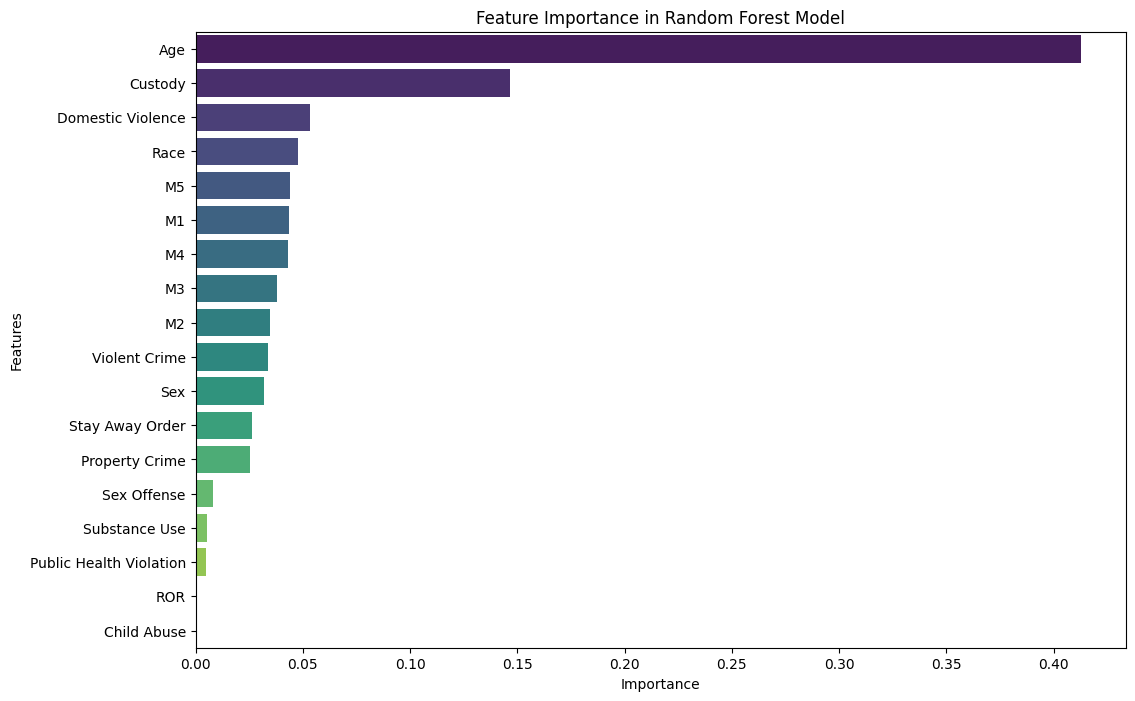

In [90]:
feature_importances = rf.feature_importances_
features = X_train.columns
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = features[sorted_indices]
sorted_importances = feature_importances[sorted_indices]
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importances, y=sorted_features, palette="viridis")
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [91]:
preddata = predictiondf[["Sex", "Race", "Age",
                         "Violent Crime", "Domestic Violence", "Child Abuse","Property Crime",
                         "Substance Use", "Sex Offense", "Public Health Violation",
                         "ROR", "Stay Away Order",
                         "M1", "M2", "M3", "M4", "M5"]]
predtarget =  predictiondf[["EndCase"]]

X_train, X_test, y_train, y_test = train_test_split(preddata, predtarget, random_state=0)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

rf = RandomForestClassifier(n_estimators=100, random_state=0)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)  # 5-fold cross-validation
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

cm = confusion_matrix(y_test, rf_predictions)
test_accuracy = accuracy_score(y_test, rf_predictions)
precision = precision_score(y_test, rf_predictions, average='weighted')
recall = recall_score(y_test, rf_predictions, average='weighted')
f1 = f1_score(y_test, rf_predictions, average='weighted')

print(f"Average cross-validation score: {np.mean(cv_scores):.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Average cross-validation score: 0.613
Test Accuracy: 0.639
Precision: 0.635
Recall: 0.639
F1 Score: 0.636


In [92]:
Proceeding['Has701'] = Proceeding['Has701'].map({True: 1, False: 0})
pval_df = Proceeding.groupby('Magistrate Number', as_index=False).agg({
    'Has701': 'max',
})

<ipython-input-92-bad48e5f9c09>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [93]:
dfinfo = dfinfo.dropna()
pval_df = pval_df[["Magistrate Number", "Has701"]]
pval_df = pval_df.merge(dfinfo701, left_on="Magistrate Number", right_on="Magistrate Number", how='inner')
sevdf = pval_df[pval_df.Has701 == True]
black_count = len(pval_df[pval_df.Race == "Black" ])
white_count = len(pval_df[pval_df.Race == "White"])
black_countsev = len(sevdf[sevdf.Race == "Black"])
white_countsev = len(sevdf[sevdf.Race == "White"])
black_count_no701 = black_count - black_countsev
white_count_no701 = white_count - white_countsev
table = [[black_countsev, black_count_no701],
         [white_countsev, white_count_no701]]
sev_given_b = (black_countsev/black_count * 100)
sev_given_w = (white_countsev/ white_count * 100)
res = fisher_exact(table, alternative="less")

print(f"Given Black: Probability of 701 release = {sev_given_b:.2f}%")
print(f"Given White: Probability of 701 release = {sev_given_w:.2f}%")
print(f"\nP-value of significance: {res.pvalue:.3f}")


Given Black: Probability of 701 release = 7.82%
Given White: Probability of 701 release = 8.42%

P-value of significance: 0.114


In [94]:
ogdf = update_casedf[update_casedf["EndCase"] == "NOLLE PROSEQUI"]
ogdf1 = ogdf.merge(cusinfo, left_on="Magistrate Number", right_on="Magistrate Number", how='left')
ogdf1 = ogdf1.fillna(0)
cusog = ogdf1[ogdf1["Custody"] == 1.0]
lenog = len(ogdf1)
lencog = len(cusog)
print("Out of " + str(lenog) + " cases that were identified as Nolle Prosequi,")
print(str(lencog) + " spent time in custody")
perog = (lencog/lenog) *100
print(f"at {perog:.2f}%")

Out of 2932 cases that were identified as Nolle Prosequi,
808 spent time in custody
at 27.56%


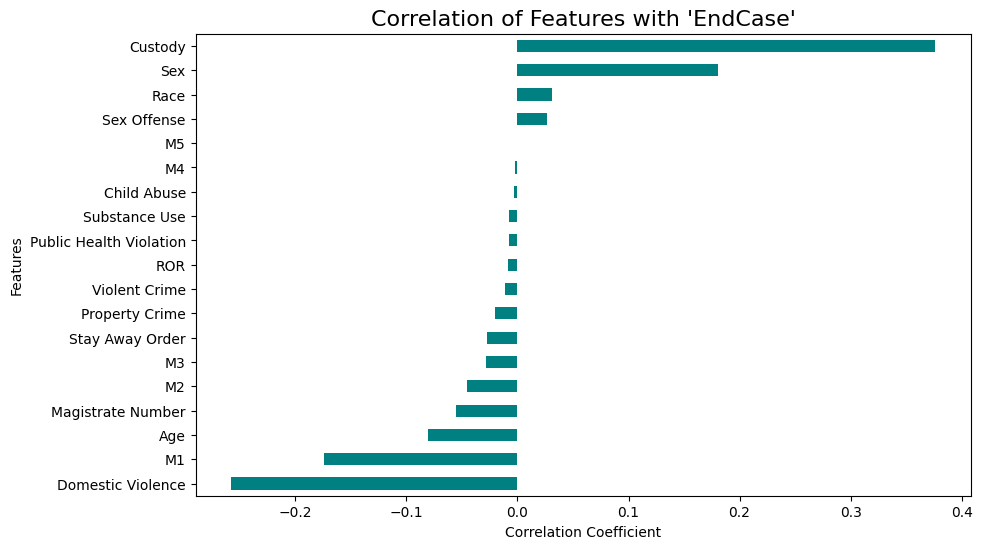

In [96]:
corrdf = predictiondf
correlation_matrix = corrdf.corr()
endcase_correlation = correlation_matrix['EndCase']
plt.figure(figsize=(10, 6))
endcase_correlation.drop("EndCase").sort_values().plot(kind='barh', color='teal')
plt.title("Correlation of Features with 'EndCase'", fontsize=16)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()